In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
heart = pd.read_csv("datasets_heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape

(303, 14)

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
for i in heart.columns:
    med = heart[i].median()
    print("The median of "+i+" is: ",med)

The median of age is:  55.0
The median of sex is:  1.0
The median of cp is:  1.0
The median of trestbps is:  130.0
The median of chol is:  240.0
The median of fbs is:  0.0
The median of restecg is:  1.0
The median of thalach is:  153.0
The median of exang is:  0.0
The median of oldpeak is:  0.8
The median of slope is:  1.0
The median of ca is:  0.0
The median of thal is:  2.0
The median of target is:  1.0


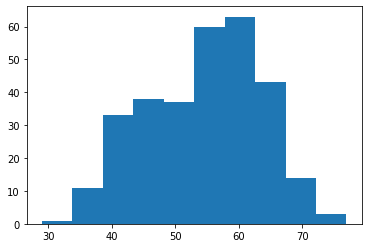

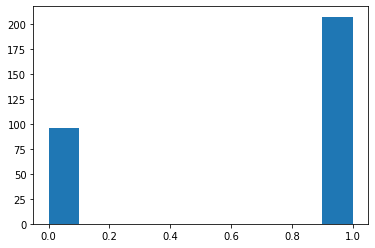

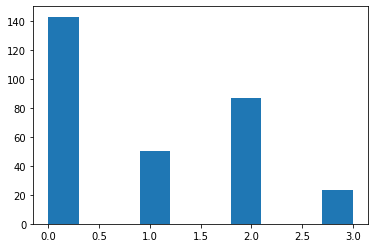

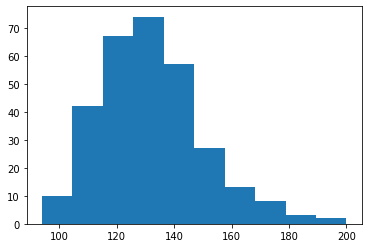

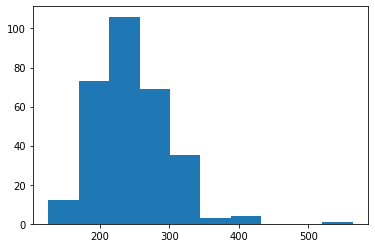

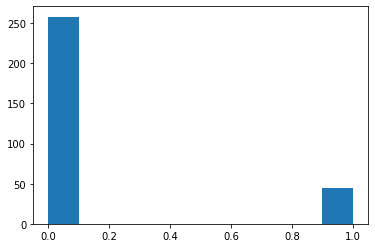

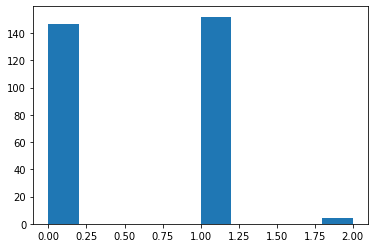

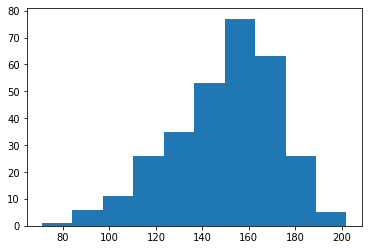

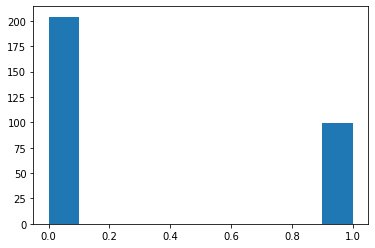

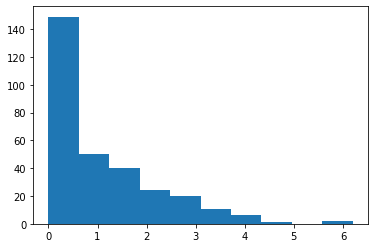

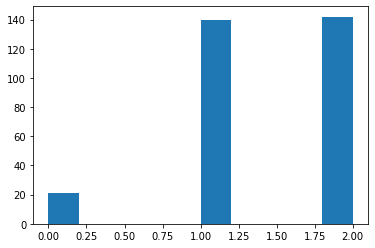

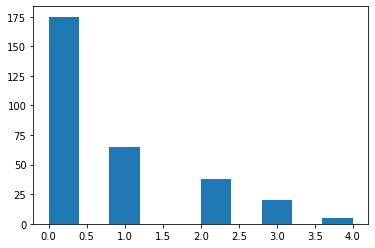

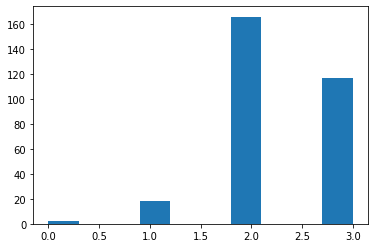

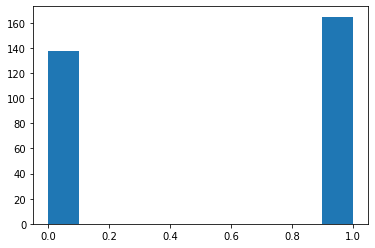

In [7]:
for i in heart.columns:
    plt.hist(heart[i])
    plt.show()

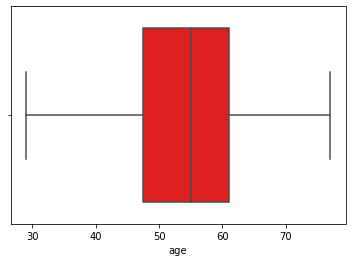

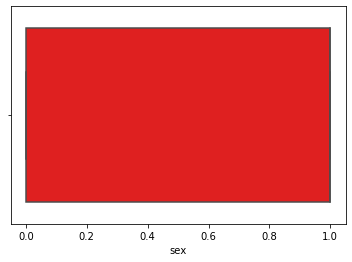

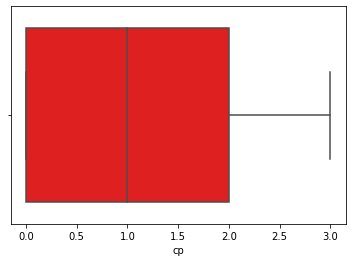

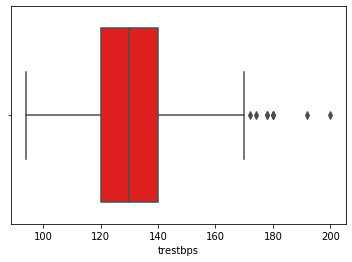

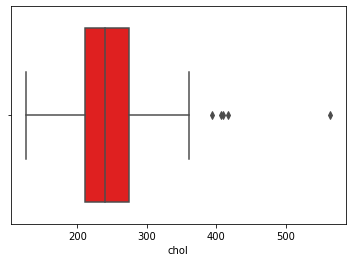

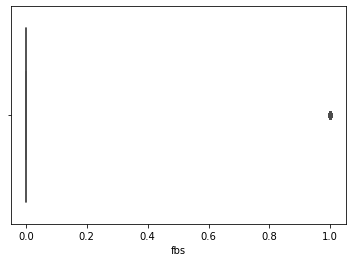

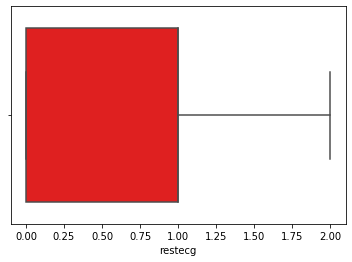

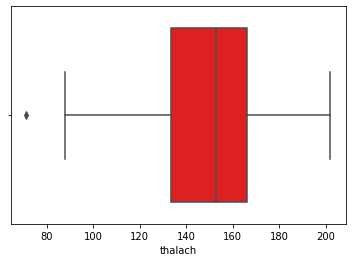

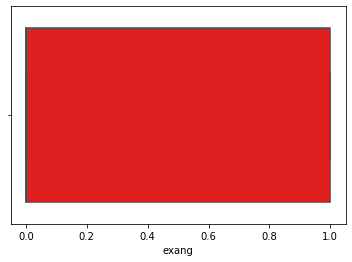

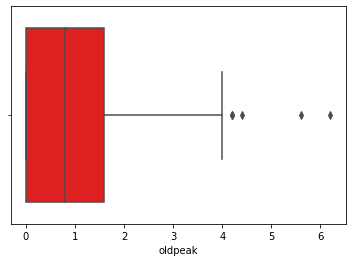

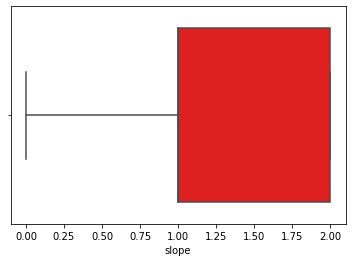

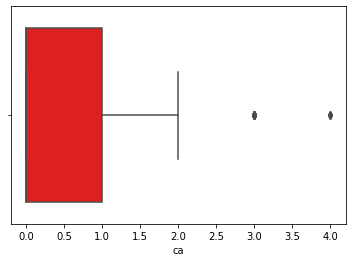

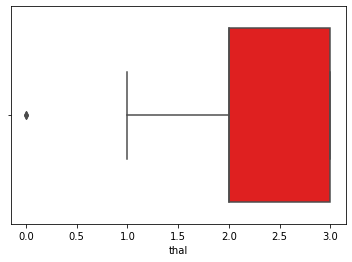

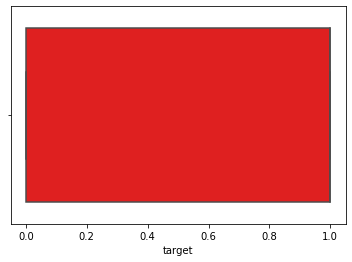

In [8]:
for i in heart.columns:
    sns.boxplot(heart[i], color="red")
    plt.show()

In [9]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


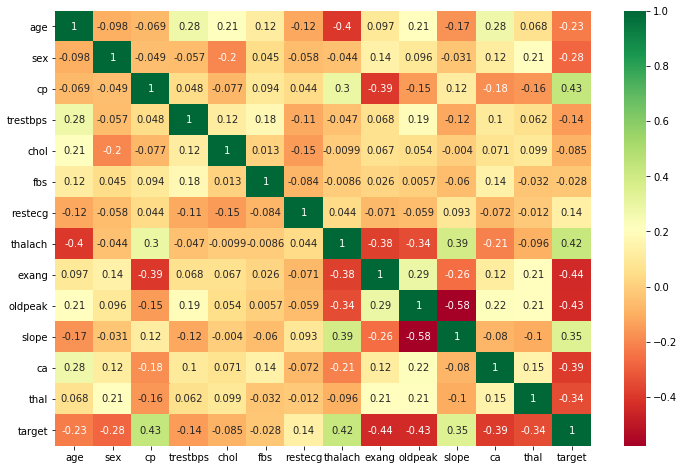

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(heart.corr(), annot=True,cmap ='RdYlGn')
plt.show()

In [11]:
for i in heart.columns:
    if (i == ("age")) | (i == ("trestbps")) | (i == ("chol")) | (i == ("thalach")) | (i == ("oldpeak")):
        pass
    else:
        x = heart[i].value_counts()
        print("Count of values of",i,"are:\n",x)
        print()

Count of values of sex are:
 1    207
0     96
Name: sex, dtype: int64

Count of values of cp are:
 0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Count of values of fbs are:
 0    258
1     45
Name: fbs, dtype: int64

Count of values of restecg are:
 1    152
0    147
2      4
Name: restecg, dtype: int64

Count of values of exang are:
 0    204
1     99
Name: exang, dtype: int64

Count of values of slope are:
 2    142
1    140
0     21
Name: slope, dtype: int64

Count of values of ca are:
 0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

Count of values of thal are:
 2    166
3    117
1     18
0      2
Name: thal, dtype: int64

Count of values of target are:
 1    165
0    138
Name: target, dtype: int64



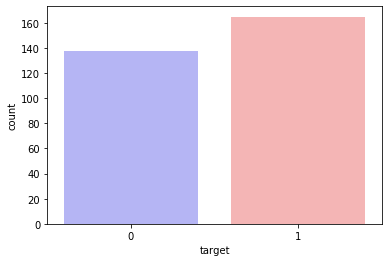

In [12]:
sns.countplot(x="target", data=heart, palette="bwr")
plt.show()

In [13]:
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


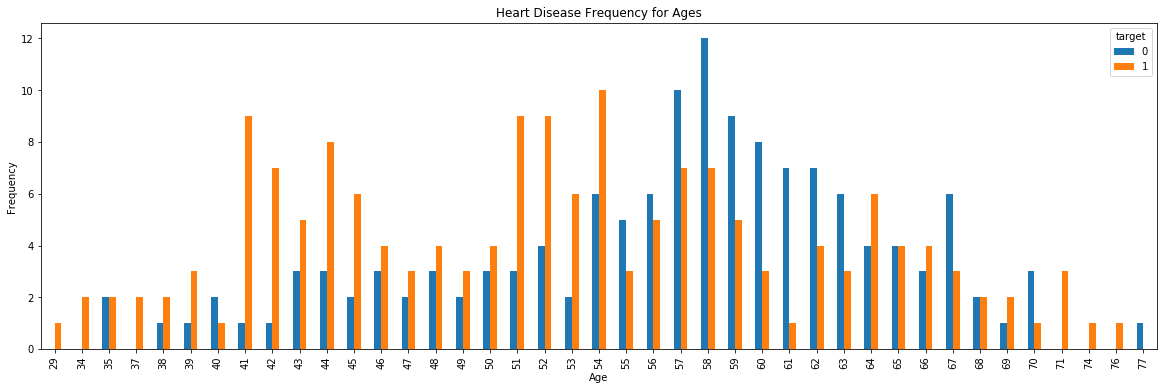

In [14]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

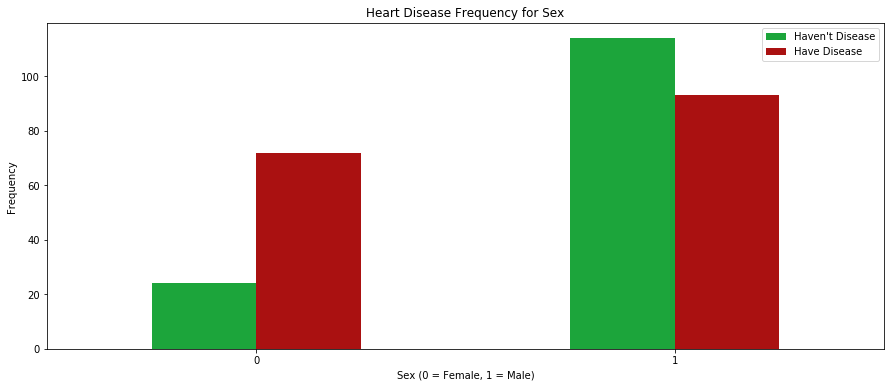

In [15]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

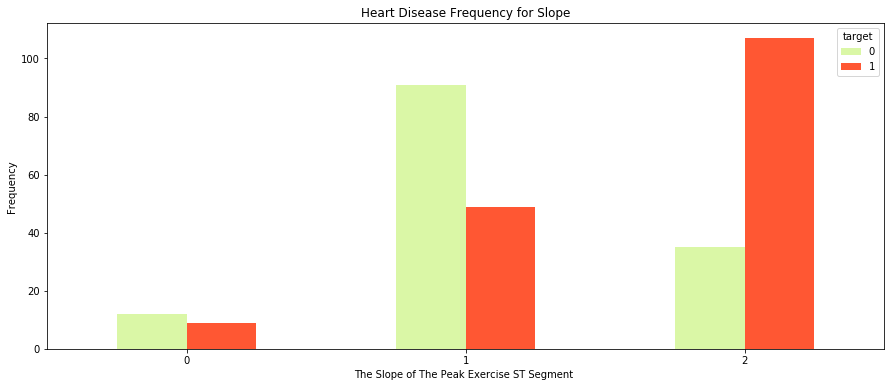

In [15]:
pd.crosstab(heart.slope,heart.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

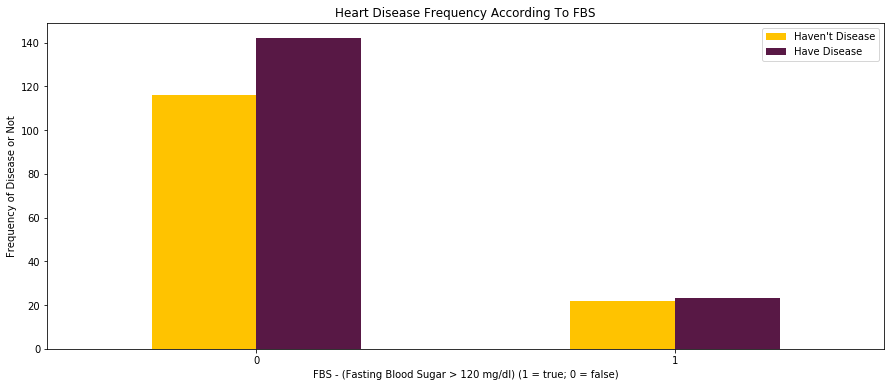

In [16]:
pd.crosstab(heart.fbs,heart.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

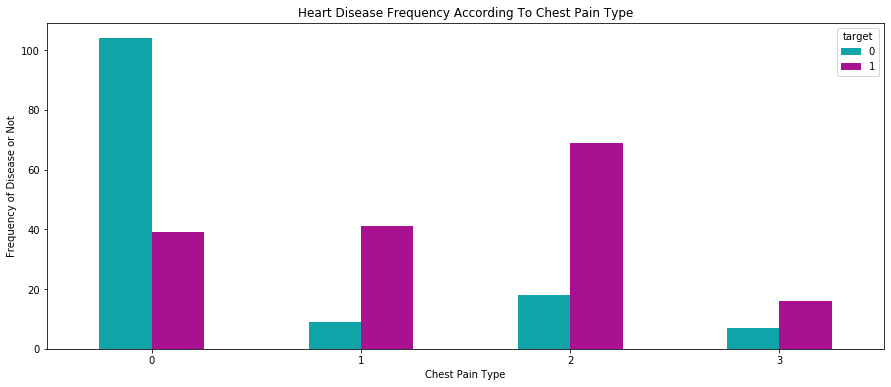

In [17]:

pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [18]:
y = heart.pop("target")  #Only defined column is selected
x = heart
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [19]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(x_train, y_train)
pred1 = clf.predict(x_test)
print(accuracy_score(y_test, pred1)*100)

88.52459016393442


In [20]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.94      0.85      0.89        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [21]:
print(confusion_matrix(y_test, pred1))

[[25  2]
 [ 5 29]]


In [22]:
import pickle
pickle_out = open("classifier_heart.pkl","wb")
pickle.dump(clf, pickle_out)
pickle_out.close()